# **Project Description – Image classification using CNNs in Keras**

# **Data Description:**

You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo.


## Dataset:
The dataset can be download from Olympus. The data file names are:
- images.npy
- Label.csv

The original files are from Kaggle. Due to the large volume of data, the images were converted to images.npy file and the labels are also put into the Labels.csv. So that you can work on the data/project seamlessly without worrying about the high data volume.


Link to the Kaggle project site: https://www.kaggle.com/c/plant-seedlings-classification/data?select=train

<font color='red'><b>Note: For project purposes, download the data provided on Olympus.</b>

# **Context:**

Can you differentiate a weed from a crop seedling? 

The ability to do so effectively can mean better crop yields and better stewardship of the environment. 

The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 species at several growth stages


# **Objective:**

To implement the techniques learnt as a part of the course.


# **Learning Outcomes:**

   * Pre-processing of image data.
   * Visualization of images.
   * Building CNN.
   * Evaluate the Model.
   * The motive of the project is to make the learners capable to handle images/image classification problems, during this process you should also be capable to handle real image files, not just limited to a numpy array of image pixels.





## Guide to solve the project seamlessly:
- Read the problem statement carefully from start to end (including the note at the end). The highlighted part in the attached problem statement should not be missed.
- Download the dataset from the Olympus platform.
- Upload the "images.npy" and “Labels.csv” file to google drive.
- Then you can use the dataset path in the Google Colab notebook to do further steps related to project problem statement.
- You can set runtime type to “GPU” in Google Colab, so that the code will run faster as you will be using CNN to fit your model.

<b>Note:
- Download the train images from the Olympus Platform.
- Do not download the dataset from Kaggle, as:

    1) The dataset is big.

    2) The dataset has 2 files for train and test images, but the labels are only for the train file. Test file has no labels associated with it. So, when you want to know the accuracy of model on test images, there’s no way to measure it. That’s why the data provided to you on Olympus has only train images and their labels. For our purpose we use this for our training and testing and validation purpose. </b>

## GitHub repository URL

## https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-apr20-SubratMuruni.git

## **Deliverable – 1: Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)**

<font color='brown'><b>1.1 Import necessary Python Libraries</b></font>

In [174]:
# Import all essential python libraries

import numpy as np  # importing Numpy
import pandas as pd  #importing Pandas
import cv2
import scipy.stats as stats # importing Scipy for statistical operations
import matplotlib.pyplot as plt # importing Matplotlib
import seaborn as sns # importing Seaborn
sns.set(color_codes = True) # setting the background of the visualization graph
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
# importing metrics for calculating the scores
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_auc_score, roc_curve
from tensorflow.keras import optimizers
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.optimizers import Adam

In [175]:
# check the version of tensorflow
import tensorflow as tf
print(tf.__version__)

2.3.0


<font color='brown'><b>1.2 Load dataset</b></font>

In [176]:
# load the datasets separately for images and the labels
X = np.load('/content/drive/My Drive/Artificial Neural Networks/DataSets/images.npy')
y = pd.read_csv('/content/drive/My Drive/Artificial Neural Networks/DataSets/Labels.csv')

<font color='brown'><b>1.3 General characteristic of the dataset</b></font>

<font color='brown'><b>1.3.1 Shape of dataset</b></font>

In [177]:
# print the shape of X and y
print(X.shape)
print('')
print(y.shape)

(4750, 128, 128, 3)

(4750, 1)


<font color='brown'><b>1.3.2 Dataset type</b></font>

In [178]:
# find the data types for both X and y respectively
print(type(X)) # numpy array
print('')
print(type(y)) # dataframe

<class 'numpy.ndarray'>

<class 'pandas.core.frame.DataFrame'>


<font color='brown'><b>1.3.3 Values of labels in the dataset</b></font>

In [179]:
# check for values of abels in y as y is a dataframe
y.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [180]:
# check for count of unique labels in y
y['Label'].nunique() # there are 12 unique labels confirming the 12 plant species from problem statement

12

In [181]:
# check for unique labels in y
y['Label'].unique()

array(['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent'], dtype=object)

In [182]:
# check the value count of each label(plant species) in y
y['Label'].value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: Label, dtype: int64

<font color='blue'><b>The count of classes shows that the dataset has imbalance classes and the model may lean towards the majority class</b></font>

In [184]:
# check for the shape of a single value of X
X[15,:,:,:].shape

(128, 128, 3)

<font color='brown'><b>1.4 Visualize images in dataset</b></font>

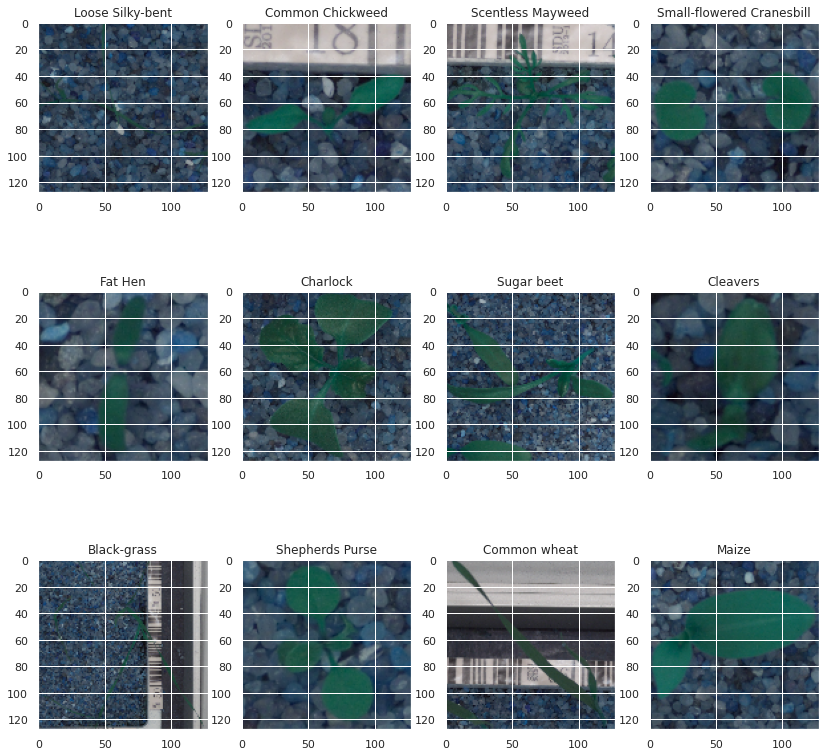

In [185]:
# visualize the images of the dataset for different species
plt.figure(figsize=(14,14))
index = [4096,1423,2711,0,496,2034,3227,2424,3833,971,1202,3612]
pos = 1

for i in index:
    plt.subplot(3,4,pos)
    image = X[i]
    label = y['Label'][i][0]
    plt.imshow(image)
    pos +=1
    plt.title(y['Label'][i]);

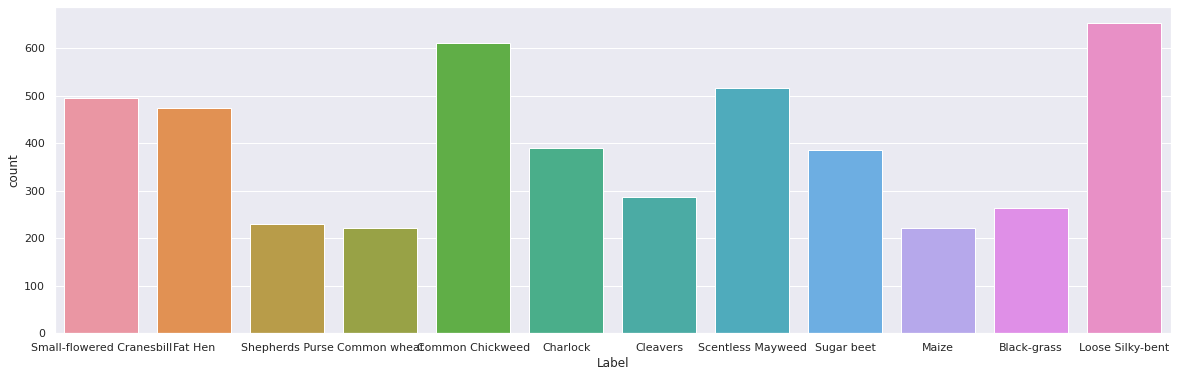

In [186]:
# plot the count of the plant species in the dataset
plt.figure(figsize=(20,6))
sns.countplot(y['Label'])
plt.show();

## **Deliverable – 2: Data Pre-processing (15 Marks)**
a. Normalization.

b. Gaussian Blurring.

c. Visualize data after pre-processing.

<font color='brown'><b>2.1 Normalization</b></font>

<font color='brown'><b>2.1.1 Convert Categorical to Numerical for y</b></font>

In [187]:
# replace categorical value of labels into numericals by creating a dictionary
label_dict = {'Loose Silky-bent':0,
              'Common Chickweed':1,
              'Scentless Mayweed':2,
              'Small-flowered Cranesbill':3,
              'Fat Hen':4,
              'Charlock':5,
              'Sugar beet':6,
              'Cleavers':7,
              'Black-grass':8,
              'Shepherds Purse':9,
              'Common wheat':10,
              'Maize':11}

In [188]:
# copy the y dataframe into a new dataframe new_y
new_y = y.copy()
# replace the categorical values of label to numerical
new_y['Label'] = new_y['Label'].replace(label_dict)

In [189]:
# save the dataframe into an array new_y by converting it into an array
new_y = new_y.values

In [190]:
# check that new_y has been converted from dataframe to an array
new_y

array([[3],
       [3],
       [3],
       ...,
       [0],
       [0],
       [0]])

<font color='brown'><b>2.1.2 Normalize the images</b></font>

In [191]:
# normalize RGB dataset by dividing it by 255 and then converting the datatype to float. 
X = X.astype('float32')/255

In [192]:
# check the effect of normalization on the image dataset
print('X shape:', X.shape)
print()
print('Images in X:', X.shape[0])
print()
print('Max Value in X:', X.max())
print()
print('Min Value in X:', X.min())

X shape: (4750, 128, 128, 3)

Images in X: 4750

Max Value in X: 1.0

Min Value in X: 0.0


<font color='brown'><b>2.2 Gaussian Blurring</b></font>

In [193]:
# save the original array X into a new array
new_X = np.empty((4750,128,128,3))

In [194]:
# check the shape of the new empty array formed
new_X.shape

(4750, 128, 128, 3)

In [195]:
# enumerate the values of X into the new array new_X
for idx, line in enumerate(X):
    new_X[idx] =  line.reshape((128,128,3))

In [196]:
# check the length of the new array
len(new_X)

4750

In [197]:
# apply Gaussian blurring on the new array new_X
for idx, img in enumerate(new_X):
    new_X[idx] = cv2.GaussianBlur(img,(5,5),0)

<font color='brown'><b>2.3 Visualize data after pre-processing(Applying Gaussian Blurring technique)</b></font>

<font color='brown'><b>2.3.1 Visualize images after applying blurring technique</b></font>

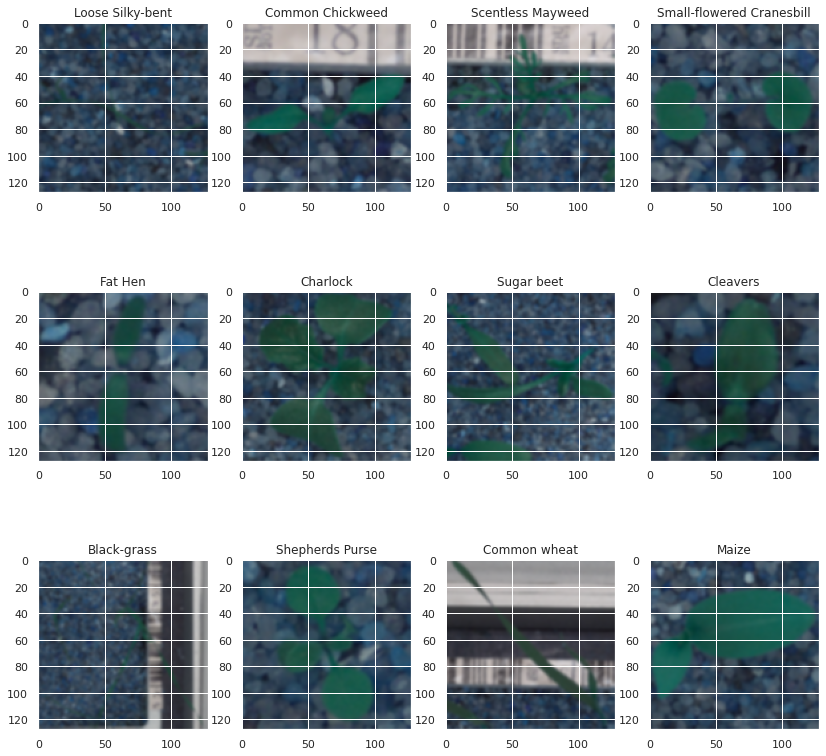

In [198]:
# visualize the images of the new_X dataset
plt.figure(figsize=(14,14))
index = [4096,1423,2711,0,496,2034,3227,2424,3833,971,1202,3612]
pos = 1

for i in index:
    plt.subplot(3,4,pos)
    image = new_X[i]
    label = y['Label'][i][0]
    plt.imshow(image)
    pos +=1
    plt.title(y['Label'][i]);

<font color='brown'><b>2.3.2 Compare images before blurring and after blurring</b></font>

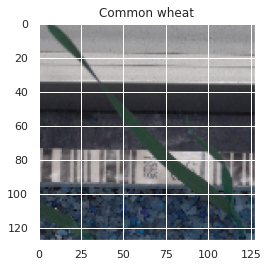

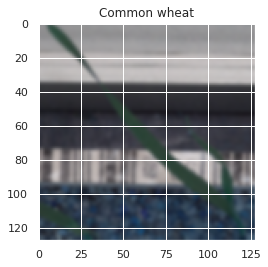

In [199]:
# compare the images before blurring and after blurring
# plot original image
i = 1202
image = X[i]
plt.imshow(image)
plt.title(y['Label'][i])
plt.show();

# plot blurred image to compare
i = 1202
image = new_X[i]
plt.imshow(image)
plt.title(y['Label'][i])
plt.show();

## **Deliverable – 3: Make data compatible (10 Marks)**
a. Convert labels to one-hot-vectors.

b. Print the label for y_train[0].

c. Split the dataset into training, testing, and validation set.

*(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5)*

d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape.

<font color='brown'><b>3.1 Label conversion to one-hot-vectors</b></font>

In [200]:
# print the new_y array after label replacement
new_y

array([[3],
       [3],
       [3],
       ...,
       [0],
       [0],
       [0]])

In [201]:
# apply one-hot encoding on y variable and store it in a new array
final_y = to_categorical(new_y, num_classes=12)

<font color='brown'><b>3.2 Print the label for y_train[0]</b></font>

In [202]:
# print the value of y in index position 0
print("Shape of final_y:", final_y.shape)
print("One value of final_y:", final_y[0]) # data is not split yet into train and test. This is the entire set of labels 

Shape of final_y: (4750, 12)
One value of final_y: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


<font color='brown'><b>3.3 Split data into train, test and validation in ratio 70:30 (Train - Test) and 50:50 on the resulting test set (Train - Validate)</b></font>

In [203]:
# split the original dataset into ratio 70:30
X_train, X_test_1, y_train, y_test_1 = train_test_split(new_X,final_y,test_size=0.30, random_state=42)
# check the shape of the resulting dataset after split
print(X_train.shape, X_test_1.shape, y_train.shape,y_test_1.shape)
print()

# split the resulting test dataset into ratio 50:50
X_test, X_validate, y_test, y_validate = train_test_split(X_test_1,y_test_1,test_size=0.50, random_state=42)
# check the shape of the resulting dataset after split
print(X_test.shape, X_validate.shape, y_test.shape,y_validate.shape)

(3325, 128, 128, 3) (1425, 128, 128, 3) (3325, 12) (1425, 12)

(712, 128, 128, 3) (713, 128, 128, 3) (712, 12) (713, 12)


<font color='brown'><b>3.4 Reshape data (If Needed)</b></font>

<font color='blue'>
1. Sequential model in tensorflow.keras expects data to be in the format (n_e, n_h, n_w, n_c)
<br>
2. n_e= number of examples, n_h = height, n_w = width, n_c = number of channels
<br>
3. <font color='red'><b>Reviewing the data, the shape is in the compatible format (Volume/Tensor), so no reshaping is needed.

In [204]:
# shape of images are in volume
print(X_train.shape[1:])
print()
print(X_test.shape[1:])
print()
print(X_validate.shape[1:])

(128, 128, 3)

(128, 128, 3)

(128, 128, 3)


In [205]:
# shape of labels is in vector 
print(y_train[0])
print(y_test[0])
print(y_validate[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [206]:
# input shape to the CNN network
X_train.shape # the shape is the volume/tensor that CNN expects. hence there will be no reshaping. 

(3325, 128, 128, 3)

## **Deliverable - 4: Build CNN (15 Marks)**
a. Define layers.

b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

<font color='brown'><b>4.1 Define CNN Model</b></font>

In [207]:
# input shape of the tensor 
input_shape = (128,128,3)
# number of classes to classify
num_classes = 12

# initialize the constructor
model = Sequential()

# convolutional layer 1 with 32 kernels and kernel size = 5*5 with padding
model.add(Conv2D(32,(5,5), padding='same',activation='relu', input_shape=X_train.shape[1:]))

# convolutional layer 2 
model.add(Conv2D(32,(5,5),padding='same', activation='relu'))

# pooling layer 1
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# convolutional layer 3
model.add(Conv2D(64,(5,5),padding='same', activation='relu'))

# convolutional layer 4
model.add(Conv2D(64,(5,5),padding='same', activation='relu'))

# pooling layer 2
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten the tensor to vector to feed into the dense neural network
model.add(Flatten())

# hidden layer 1
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.25))

# hidden layer 2
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))

# hidden layer 3
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))

# output layer
model.add(Dense(num_classes, activation='softmax'))

<font color='brown'><b>4.2 Compile model using Adam Optimizer and Categorical crossentropy</b></font>

In [208]:
# define optimizer with learning rate
optimizer = Adam(learning_rate=0.0001)

# compile model
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

In [209]:
# print model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 128, 128, 32)      2432      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 128, 128, 32)      25632     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 64, 64, 64)        51264     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 64, 64, 64)        102464    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 64)       

<font color='brown'><b>4.3 Implement early stopping and model checkpoint save</b></font>

In [210]:
# stop training if the gain in validation loss is less than 0.001
early_stopping = EarlyStopping(monitor='val_loss', min_delta = 0.001, patience = 10)

# save the model at specific checkpoint
model_checkpoint =  ModelCheckpoint('sapling_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           save_freq='epoch')

## **Deliverable - 5: Fit and evaluate model and print confusion matrix (10 Marks)**

<font color='brown'><b>5.1 Train the model with Training data</b></font>

In [211]:
# fit model using batch size = 32 and epochs = 100 with provision for early stopping 
history = model.fit(X_train,
                    y_train, 
                    batch_size = 32, 
                    epochs = 100, 
                    validation_data=(X_validate,y_validate), 
                    shuffle = True,
                    callbacks=[early_stopping, model_checkpoint])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist)

Epoch 1/100
104/104 [==============================] - ETA: 0s - loss: 2.4228 - accuracy: 0.1435
Epoch 00001: val_loss improved from inf to 2.23247, saving model to sapling_checkpoint_01_loss2.2325.h5
104/104 [==============================] - 8s 78ms/step - loss: 2.4228 - accuracy: 0.1435 - val_loss: 2.2325 - val_accuracy: 0.2482
Epoch 2/100
104/104 [==============================] - ETA: 0s - loss: 1.9348 - accuracy: 0.3371
Epoch 00002: val_loss improved from 2.23247 to 1.52508, saving model to sapling_checkpoint_02_loss1.5251.h5
104/104 [==============================] - 8s 73ms/step - loss: 1.9348 - accuracy: 0.3371 - val_loss: 1.5251 - val_accuracy: 0.4544
Epoch 3/100
104/104 [==============================] - ETA: 0s - loss: 1.5533 - accuracy: 0.4514
Epoch 00003: val_loss improved from 1.52508 to 1.18067, saving model to sapling_checkpoint_03_loss1.1807.h5
104/104 [==============================] - 8s 74ms/step - loss: 1.5533 - accuracy: 0.4514 - val_loss: 1.1807 - val_accuracy: 

<font color='brown'><b>5.2 Evaluate Model</b></font>

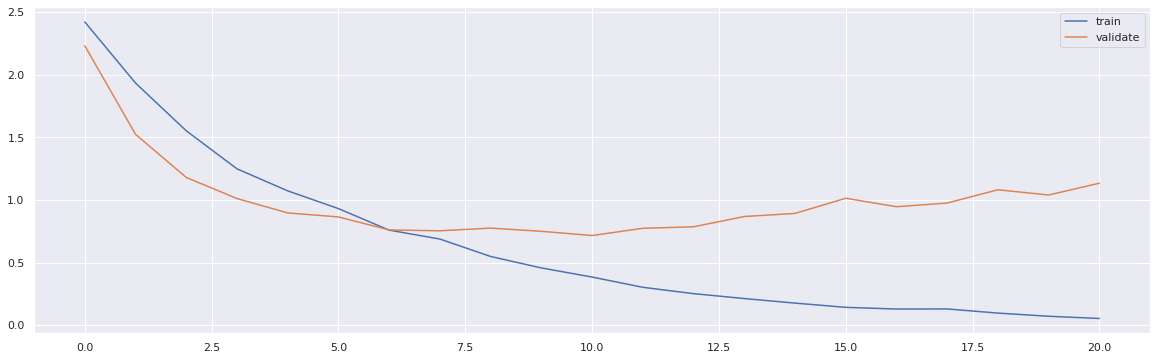

In [212]:
# plot loss vs epochs
plt.figure(figsize=(20,6))
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(('train','validate'),loc=0)
plt.show();

In [213]:
# predict dependent variable using the CNN model
y_predict = (model.predict(X_test)>0.5).astype('int32')
y_predict

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [214]:
# shape of the predictions
y_predict.shape

(712, 12)

In [215]:
# accuracy of model and loss
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.774
Loss: 1.034


### <font color='blue'><b>The accuracy on Train dataset is 98.3%

### <font color='blue'><b>The accuracy on Validate dataset is 78.4%

### <font color='blue'><b>The accuracy on Test dataset is 77.4%

<font color='brown'><b>5.3 Convert one-hot encoded y_test to the classes value</b></font>

In [216]:
# replace the numerical labels to categorical in y_test and y_predict by creating a dictionary
decode_label_dict = {0:'Loose Silky-bent',
                     1:'Common Chickweed',
                     2:'Scentless Mayweed',
                     3:'Small-flowered Cranesbill',
                     4:'Fat Hen',
                     5:'Charlock',
                     6:'Sugar beet',
                     7:'Cleavers',
                     8:'Black-grass',
                     9:'Shepherds Purse',
                     10:'Common wheat',
                     11:'Maize'}

In [217]:
# create an empty array to hold the decoded class values
new_y_test = np.empty((712,1))

# loop through y_predict and insert the index of the max value on axis = 0 in the empty array
for idx, values in enumerate(y_test):
    new_y_test[idx] = np.argmax(y_test[idx], axis=0)
    
# convert new_y_test in a dataframe
new_y_test = pd.DataFrame(new_y_test)

# rename column to Label
new_y_test.rename(columns={0:'Label'},inplace=True)

# replace the categorical labels with numerical values
new_y_test = new_y_test.replace(decode_label_dict)

# print the head of the resulting dataframe
new_y_test['Label'].unique()

array(['Common Chickweed', 'Scentless Mayweed', 'Loose Silky-bent',
       'Sugar beet', 'Small-flowered Cranesbill', 'Fat Hen', 'Maize',
       'Charlock', 'Shepherds Purse', 'Black-grass', 'Common wheat',
       'Cleavers'], dtype=object)

<font color='brown'><b>5.4 Convert one-hot encoded y_predict to the classes value</b></font>

In [218]:
# create an empty array to hold the decoded class values
new_y_pred = np.empty((712,1))

# loop through y_predict and insert the index of the max value on axis = 0 in the empty array
for idx, values in enumerate(y_predict):
    new_y_pred[idx] = np.argmax(y_predict[idx], axis=0)
    
# convert new_y_pred into a dataframe
new_y_pred = pd.DataFrame(new_y_pred)

# rename column to Label
new_y_pred.rename(columns={0:'Label'},inplace=True)

# replace the categorical labels with numerical values
new_y_pred = new_y_pred.replace(decode_label_dict)

# print the head of the resulting dataframe
new_y_pred['Label'].unique()


array(['Common Chickweed', 'Scentless Mayweed', 'Loose Silky-bent',
       'Sugar beet', 'Small-flowered Cranesbill', 'Charlock', 'Maize',
       'Fat Hen', 'Shepherds Purse', 'Black-grass', 'Common wheat',
       'Cleavers'], dtype=object)

<font color='brown'><b>5.5 Confusion Matrix</b></font>

In [219]:
# check the vlaue count of the labels in test set
new_y_test['Label'].value_counts()

Loose Silky-bent             101
Common Chickweed              88
Fat Hen                       74
Scentless Mayweed             74
Small-flowered Cranesbill     72
Charlock                      55
Cleavers                      49
Shepherds Purse               48
Sugar beet                    47
Black-grass                   41
Common wheat                  33
Maize                         30
Name: Label, dtype: int64

In [220]:
# check the value count of the labels in predict set
new_y_pred['Label'].value_counts()

Loose Silky-bent             122
Common Chickweed             111
Scentless Mayweed             71
Small-flowered Cranesbill     70
Fat Hen                       60
Charlock                      55
Sugar beet                    46
Cleavers                      45
Black-grass                   43
Shepherds Purse               37
Maize                         31
Common wheat                  21
Name: Label, dtype: int64

In [221]:
# confusion matrix
confusion_matrix(new_y_test,new_y_pred)

array([[21,  0,  0,  0,  3,  0, 16,  0,  0,  0,  0,  1],
       [ 0, 49,  2,  0,  0,  0,  0,  0,  0,  2,  1,  1],
       [ 0,  3, 38,  1,  0,  1,  1,  0,  3,  0,  2,  0],
       [ 0,  0,  0, 85,  0,  0,  0,  1,  1,  1,  0,  0],
       [ 4,  0,  0,  3, 15,  0, 10,  0,  1,  0,  0,  0],
       [ 1,  2,  3,  4,  1, 54,  4,  0,  0,  1,  2,  2],
       [17,  0,  1,  0,  0,  2, 80,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  2,  0,  0,  1, 23,  3,  0,  1,  0],
       [ 0,  1,  0,  5,  2,  0,  4,  2, 52,  4,  0,  4],
       [ 0,  0,  1,  7,  0,  1,  2,  0,  7, 28,  2,  0],
       [ 0,  0,  0,  3,  0,  0,  3,  3,  0,  1, 62,  0],
       [ 0,  0,  0,  1,  0,  2,  1,  2,  4,  0,  0, 37]])

In [222]:
# classification report
print(classification_report(new_y_test,new_y_pred))

                           precision    recall  f1-score   support

              Black-grass       0.49      0.51      0.50        41
                 Charlock       0.89      0.89      0.89        55
                 Cleavers       0.84      0.78      0.81        49
         Common Chickweed       0.77      0.97      0.85        88
             Common wheat       0.71      0.45      0.56        33
                  Fat Hen       0.90      0.73      0.81        74
         Loose Silky-bent       0.66      0.79      0.72       101
                    Maize       0.74      0.77      0.75        30
        Scentless Mayweed       0.73      0.70      0.72        74
          Shepherds Purse       0.76      0.58      0.66        48
Small-flowered Cranesbill       0.89      0.86      0.87        72
               Sugar beet       0.80      0.79      0.80        47

                 accuracy                           0.76       712
                macro avg       0.77      0.74      0.74    

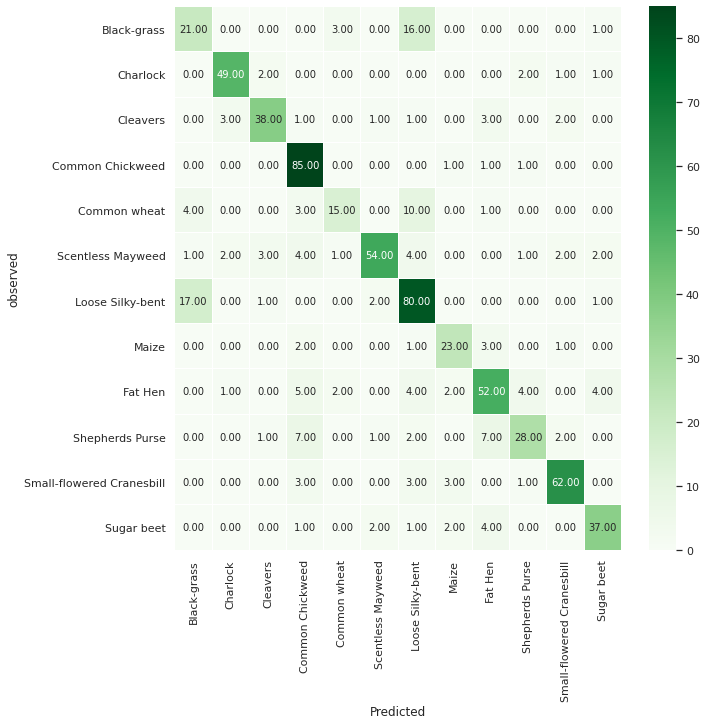

In [231]:
# plot the confusion matrix in terms of heatmap for better visualization. 
plt.figure(figsize=(10,10))
def draw_cm(actual,predicted):
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm, cmap= plt.cm.Greens,annot=True, linewidth=0.05, fmt='.2f', 
                xticklabels=['Black-grass', 'Charlock', 'Cleavers', 
                             'Common Chickweed' , 'Common wheat', 'Scentless Mayweed', 
                             'Loose Silky-bent', 'Maize', 'Fat Hen', 
                             'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet'], 
                yticklabels=['Black-grass', 'Charlock', 'Cleavers', 
                             'Common Chickweed' , 'Common wheat', 'Scentless Mayweed', 
                             'Loose Silky-bent', 'Maize', 'Fat Hen', 
                             'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet'])
    plt.ylabel('observed')
    plt.xlabel('Predicted')
    plt.show()

# pass parameters in draw_cm function to plot the heatmap. 
draw_cm(new_y_test,new_y_pred)

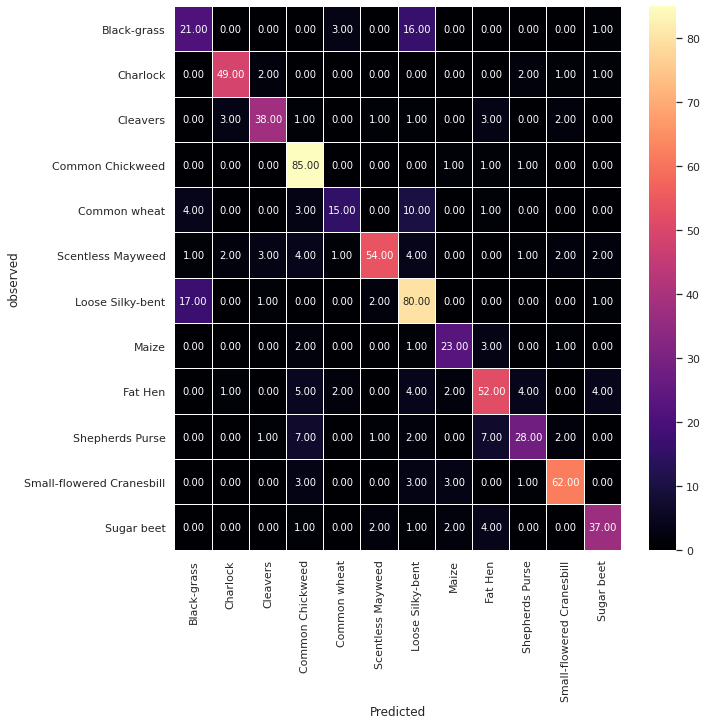

In [240]:
# plot the confusion matrix in terms of heatmap for better visualization. 
plt.figure(figsize=(10,10))
def draw_cm(actual,predicted):
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm, cmap= 'magma',annot=True, linewidth=0.05, fmt='.2f', 
                xticklabels=['Black-grass', 'Charlock', 'Cleavers', 
                             'Common Chickweed' , 'Common wheat', 'Scentless Mayweed', 
                             'Loose Silky-bent', 'Maize', 'Fat Hen', 
                             'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet'], 
                yticklabels=['Black-grass', 'Charlock', 'Cleavers', 
                             'Common Chickweed' , 'Common wheat', 'Scentless Mayweed', 
                             'Loose Silky-bent', 'Maize', 'Fat Hen', 
                             'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet'])
    plt.ylabel('observed')
    plt.xlabel('Predicted')
    plt.show()

# pass parameters in draw_cm function to plot the heatmap. 
draw_cm(new_y_test,new_y_pred)

## **Deliverable - 6: Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59].(5 Marks)**

Actual: Loose Silky-bent
Predicted: Loose Silky-bent


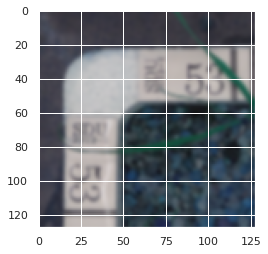

In [232]:
# visualize prediction for X_test[2]
i = 2
image = X_test[i]
plt.imshow(image)
plt.title(print('Actual:',new_y_test['Label'][i]))
plt.suptitle(print('Predicted:',new_y_pred['Label'][i]))
plt.show();

Actual: Common Chickweed
Predicted: Common Chickweed


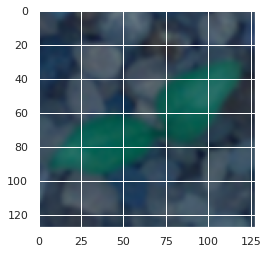

In [233]:
# visualize prediction for X_test[3]
i = 3
image = X_test[i]
plt.imshow(image)
plt.title(print('Actual:',new_y_test['Label'][i]))
plt.suptitle(print('Predicted:',new_y_pred['Label'][i]))
plt.show();

Actual: Common wheat
Predicted: Black-grass


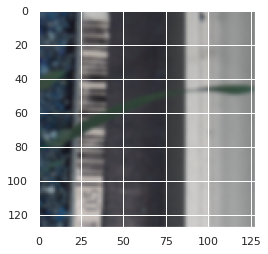

In [234]:
# visualize prediction for X_test[33]
i = 33
image = X_test[i]
plt.imshow(image)
plt.title(print('Actual:',new_y_test['Label'][i]))
plt.suptitle(print('Predicted:',new_y_pred['Label'][i]))
plt.show();

Actual: Common wheat
Predicted: Black-grass


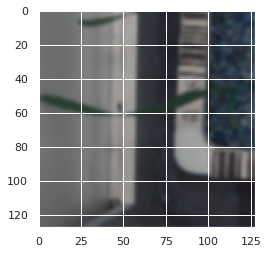

In [235]:
# visualize prediction for X_test[36]
i = 36
image = X_test[i]
plt.imshow(image)
plt.title(print('Actual:',new_y_test['Label'][i]))
plt.suptitle(print('Predicted:',new_y_pred['Label'][i]))
plt.show();

Actual: Small-flowered Cranesbill
Predicted: Small-flowered Cranesbill


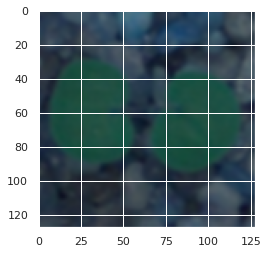

In [236]:
# visualization prediction for X_test[59]
i = 59
image = X_test[i]
plt.imshow(image)
plt.title(print('Actual:',new_y_test['Label'][i]))
plt.suptitle(print('Predicted:',new_y_pred['Label'][i]))
plt.show();

## <font color='purple'> Out of the 5 visualization of images, the model was able to predict 3 of them correctly. 